# 导包

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 读取数据

In [372]:
data = pd.read_excel('数据分析-上海房价数据-by莫斯利安.xlsx')

# 特征查看

In [373]:
data.head()         #读取数据前5行

,Unnamed: 0,总价(W),建筑面积(㎡),建筑类型,房屋朝向,建筑结构,装修情况,梯户比例,配备电梯,经纬度,行政区,户型-房间,户型-厅,户型-厨房,户型-卫生,建成时间,所处层数,总楼层
0,0,275.0,89.00,板楼,南北,砖混结构,精装,一梯两户,无,"121.2535861,31.0347424",松江,2,2,1,1,1999,高,6
1,1,310.0,75.23,板楼,南,钢混结构,精装,一梯两户,无,"121.3175491,31.24657189",嘉定,2,2,1,1,2005,高,5
2,2,405.0,129.49,板楼,南,钢混结构,毛坯,一梯两户,无,"121.7264358,31.1604964",浦东,3,2,1,2,2005,高,6
3,3,370.0,78.00,板楼,南北,砖混结构,简装,一梯四户,无,"121.488126,31.325868",宝山,3,1,1,1,1995,低,6
4,4,210.0,86.32,板楼,南北,钢混结构,其他,两梯四户,有,"121.129149,31.290665",青浦,2,2,1,1,2010,中,18


In [374]:
data.info()  #查看缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   总价(W)       9997 non-null   float64
 2   建筑面积(㎡)     10000 non-null  float64
 3   建筑类型        10000 non-null  object 
 4   房屋朝向        10000 non-null  object 
 5   建筑结构        10000 non-null  object 
 6   装修情况        10000 non-null  object 
 7   梯户比例        9609 non-null   object 
 8   配备电梯        9609 non-null   object 
 9   经纬度         10000 non-null  object 
 10  行政区         10000 non-null  object 
 11  户型-房间       10000 non-null  int64  
 12  户型-厅        10000 non-null  int64  
 13  户型-厨房       10000 non-null  int64  
 14  户型-卫生       10000 non-null  int64  
 15  建成时间        10000 non-null  object 
 16  所处层数        10000 non-null  object 
 17  总楼层         10000 non-null  int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 1.4+ MB


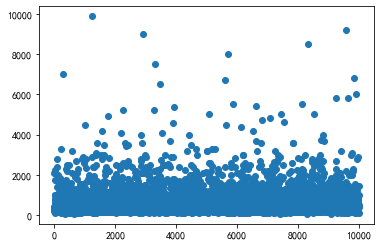

In [375]:
plt.scatter(x=range(0,len(data['总价(W)'])),y=data['总价(W)']) #查看房价数据分布

4346.57

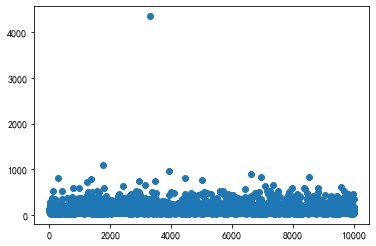

In [376]:
plt.scatter(x=range(0,len(data['建筑面积(㎡)'])),y=data['建筑面积(㎡)']) #查看房价建筑面积分布， 发现一个很大的值 可能大别墅 4346.57 面积，且只出现一次这种点
data['建筑面积(㎡)'].max()

In [377]:
data['建筑类型'].value_counts()             #建筑类型分为5类

板楼      8600
塔楼       914
钢混结构     353
暂无数据      93
砖混结构      34
未知结构       4
板塔结合       2
Name: 建筑类型, dtype: int64

In [378]:
data['房屋朝向'].value_counts()             #房屋朝向很多无关数据，后面需要剔除

南          7381
南北         1117
暂无数据        322
东南          219
装修情况：精装     209
西南          160
装修情况：毛坯     119
东           104
北            99
西            64
装修情况：其他      42
西北           42
东北           30
装修情况：简装      21
南西南          13
东南南          12
东西           11
南西            9
南西北           7
东南北           5
东南西南          3
南东北           2
东南西北          2
西南西北          2
西南东北          1
东南东北          1
东东南           1
西南西           1
西南北           1
Name: 房屋朝向, dtype: int64

In [379]:
data['建筑结构'].value_counts()             #建筑类型分为5类，也有一些错误数据

钢混结构         5760
砖混结构         3741
别墅类型：独栋       132
别墅类型：暂无数据     109
未知结构          108
别墅类型：联排       100
别墅类型：双拼        33
别墅类型：叠拼        17
Name: 建筑结构, dtype: int64

In [380]:
data['装修情况'].value_counts()             #建筑类型分为5类，错误数据产权

精装          4428
简装          2520
其他          1957
毛坯           704
产权年限：未知      334
产权年限：70年      57
Name: 装修情况, dtype: int64

In [381]:
data['梯户比例'].value_counts()             #建筑类型分为5类，有点离谱 一梯四十七户，但是可能是大厂房或者宿舍


一梯两户      3846
一梯四户      1759
一梯三户      1183
两梯四户       458
两梯三户       327
          ... 
一梯三十四户       1
四梯十九户        1
两梯十九户        1
四梯三户         1
一梯四十七户       1
Name: 梯户比例, Length: 124, dtype: int64

In [382]:
data['配备电梯'].value_counts()             #建筑类型分为5类，暂无数据算成没有电梯的


无       5400
有       3610
暂无数据     599
Name: 配备电梯, dtype: int64

In [383]:
data['行政区'].value_counts()             #行政区数据 ， 浦东 有2638 条


浦东    2638
闵行    1248
松江     887
宝山     656
徐汇     624
杨浦     608
普陀     568
青浦     476
长宁     469
嘉定     449
虹口     357
闸北     319
黄浦     305
静安     196
奉贤     176
金山      16
崇明       8
Name: 行政区, dtype: int64

In [384]:
data['户型-房间'].value_counts()             #'户型-房间'统计


2    4852
3    2317
1    2044
4     533
5     183
6      53
7      14
8       3
9       1
Name: 户型-房间, dtype: int64

In [385]:
data['户型-厅'].value_counts()             #户型-厅 统计


2    4618
1    4603
0     545
3     211
4      21
5       1
6       1
Name: 户型-厅, dtype: int64

In [386]:
data['户型-厨房'].value_counts()             #户型-厨房 统计 

1    9874
2      84
0      32
3       5
4       4
6       1
Name: 户型-厨房, dtype: int64

In [387]:
data['户型-卫生'].value_counts()             #户型-卫生 统计


1    7589
2    1810
3     351
4     144
5      61
0      27
6      10
7       5
8       2
9       1
Name: 户型-卫生, dtype: int64

In [388]:
data['建成时间'].value_counts()             #建成时间 统计

1994    590
1995    578
未知      555
2005    468
2006    431
       ... 
1972      1
1969      1
1968      1
1950      1
1961      1
Name: 建成时间, Length: 71, dtype: int64

In [389]:
data['所处层数'].value_counts()             #所处层数 统计

高    3716
中    3185
低    3099
Name: 所处层数, dtype: int64

In [390]:
data['总楼层'].value_counts()             #总楼层 统计

6     4361
5      661
18     584
11     487
7      471
14     382
3      232
24     214
4      199
17     187
16     180
12     160
13     154
2      154
8      134
20     105
28     103
15      97
26      96
19      83
25      82
21      80
9       73
22      69
27      69
32      68
10      67
30      62
29      61
31      59
23      52
1       46
33      41
34      40
37      17
35      14
36      14
38      13
39      11
40       4
53       4
58       2
49       2
44       1
47       1
41       1
43       1
80       1
56       1
Name: 总楼层, dtype: int64

# 特征工程和数据清洗 <br>
### 需要把所有特征数字化，不能有字符，中文

In [391]:
data=data.dropna()  #删除带空值的列
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9609 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9609 non-null   int64  
 1   总价(W)       9609 non-null   float64
 2   建筑面积(㎡)     9609 non-null   float64
 3   建筑类型        9609 non-null   object 
 4   房屋朝向        9609 non-null   object 
 5   建筑结构        9609 non-null   object 
 6   装修情况        9609 non-null   object 
 7   梯户比例        9609 non-null   object 
 8   配备电梯        9609 non-null   object 
 9   经纬度         9609 non-null   object 
 10  行政区         9609 non-null   object 
 11  户型-房间       9609 non-null   int64  
 12  户型-厅        9609 non-null   int64  
 13  户型-厨房       9609 non-null   int64  
 14  户型-卫生       9609 non-null   int64  
 15  建成时间        9609 non-null   object 
 16  所处层数        9609 non-null   object 
 17  总楼层         9609 non-null   int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 1.4+ MB


### 房屋朝向数据错误较多  百度查询 房屋仅有 8个朝向 1.东 2.南 3.西 4.北 5.东北 6.西北 7.西南 8.东南 

In [392]:
mapDirct = {'东':1,'南':2,'西':3,'北':4,'东北':5,'西北':6,'西南':7,'东南':8} # 构建一个字典， 非字典的值直接变成空值，删除空值便可以剔除异常数据
data['房屋朝向']=data['房屋朝向'].map(mapDirct)    # 进行map 映射 ,没有的值都映射为 空值
data=data.dropna()                                # 删除空值的行
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8099 entries, 1 to 9999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8099 non-null   int64  
 1   总价(W)       8099 non-null   float64
 2   建筑面积(㎡)     8099 non-null   float64
 3   建筑类型        8099 non-null   object 
 4   房屋朝向        8099 non-null   float64
 5   建筑结构        8099 non-null   object 
 6   装修情况        8099 non-null   object 
 7   梯户比例        8099 non-null   object 
 8   配备电梯        8099 non-null   object 
 9   经纬度         8099 non-null   object 
 10  行政区         8099 non-null   object 
 11  户型-房间       8099 non-null   int64  
 12  户型-厅        8099 non-null   int64  
 13  户型-厨房       8099 non-null   int64  
 14  户型-卫生       8099 non-null   int64  
 15  建成时间        8099 non-null   object 
 16  所处层数        8099 non-null   object 
 17  总楼层         8099 non-null   int64  
dtypes: float64(3), int64(6), object(9)
memory usage: 1.2+ MB


### 建筑类型 特征处理 

In [393]:
data['建筑类型'].value_counts()             #建筑类型分为5类 

板楼      7203
塔楼       818
暂无数据      76
板塔结合       2
Name: 建筑类型, dtype: int64

In [394]:
mapDirct = {'板楼':1,'塔楼':2,'暂无数据':2,'板塔结合':3}  #采用众数来对 对暂无数据进行填充
data['建筑类型']=data['建筑类型'].map(mapDirct)

### 建筑结构特征处理

In [395]:
data['建筑结构'].value_counts()

钢混结构    4722
砖混结构    3291
未知结构      86
Name: 建筑结构, dtype: int64

In [396]:
mapDirct = {'钢混结构':1,'砖混结构':2,'未知结构':1}  #采用众数来对 对暂无数据进行填充
data['建筑结构']=data['建筑结构'].map(mapDirct)

In [397]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8099 entries, 1 to 9999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8099 non-null   int64  
 1   总价(W)       8099 non-null   float64
 2   建筑面积(㎡)     8099 non-null   float64
 3   建筑类型        8099 non-null   int64  
 4   房屋朝向        8099 non-null   float64
 5   建筑结构        8099 non-null   int64  
 6   装修情况        8099 non-null   object 
 7   梯户比例        8099 non-null   object 
 8   配备电梯        8099 non-null   object 
 9   经纬度         8099 non-null   object 
 10  行政区         8099 non-null   object 
 11  户型-房间       8099 non-null   int64  
 12  户型-厅        8099 non-null   int64  
 13  户型-厨房       8099 non-null   int64  
 14  户型-卫生       8099 non-null   int64  
 15  建成时间        8099 non-null   object 
 16  所处层数        8099 non-null   object 
 17  总楼层         8099 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage: 1.2+ MB


### 装修情况特征处理

In [398]:
data['装修情况'].value_counts()

精装    3722
简装    2201
其他    1622
毛坯     554
Name: 装修情况, dtype: int64

In [399]:
mapDirct = {'精装':1,'简装':2,'毛坯':3,'其他':4}  #采用众数来对 对未知结构进行填充
data['装修情况']=data['装修情况'].map(mapDirct)

### 梯户比例 特征处理

In [400]:
index=data['梯户比例'].value_counts().index

In [401]:
mapDirct=dict(zip(index,range(len(index),0,-1)))
mapDirct

{'一梯两户': 119,
 '一梯四户': 118,
 '一梯三户': 117,
 '两梯四户': 116,
 '两梯三户': 115,
 '一梯五户': 114,
 '一梯六户': 113,
 '两梯八户': 112,
 '两梯两户': 111,
 '两梯六户': 110,
 '一梯一户': 109,
 '一梯八户': 108,
 '两梯五户': 107,
 '一梯七户': 106,
 '两梯七户': 105,
 '两梯十户': 104,
 '三梯八户': 103,
 '三梯六户': 102,
 '两梯十二户': 101,
 '一梯十二户': 100,
 '两梯九户': 99,
 '三梯四户': 98,
 '一梯二十四户': 97,
 '一梯十户': 96,
 '一梯九户': 95,
 '一梯二十户': 94,
 '一梯二十一户': 93,
 '三梯十六户': 92,
 '两梯十一户': 91,
 '一梯三十七户': 90,
 '一梯十六户': 89,
 '三梯九户': 88,
 '一梯二十八户': 87,
 '三梯两户': 86,
 '三梯十户': 85,
 '一梯二十二户': 84,
 '三梯十二户': 83,
 '一梯二十七户': 82,
 '三梯二十户': 81,
 '一梯十八户': 80,
 '三梯七户': 79,
 '一梯十五户': 78,
 '两梯十七户': 77,
 '一梯十一户': 76,
 '两梯十三户': 75,
 '三梯二十二户': 74,
 '一梯十三户': 73,
 '两梯一户': 72,
 '四梯十五户': 71,
 '一梯十九户': 70,
 '一梯三十六户': 69,
 '四梯二十四户': 68,
 '六梯三十二户': 67,
 '三梯二十四户': 66,
 '三梯三户': 65,
 '三梯十一户': 64,
 '一梯十四户': 63,
 '两梯十五户': 62,
 '一梯二十九户': 61,
 '四梯十三户': 60,
 '一梯三十一户': 59,
 '三梯二十六户': 58,
 '四梯三十三户': 57,
 '一梯十七户': 56,
 '四梯六户': 55,
 '三梯十五户': 54,
 '两梯十六户': 53,
 '一梯八十户': 52,
 '一梯三十户': 51,
 '一梯二十三户': 50,
 '五梯二十五户': 49

In [402]:
data['梯户比例']=data['梯户比例'].map(mapDirct)

### 配备电梯  特征处理

In [403]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8099 entries, 1 to 9999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8099 non-null   int64  
 1   总价(W)       8099 non-null   float64
 2   建筑面积(㎡)     8099 non-null   float64
 3   建筑类型        8099 non-null   int64  
 4   房屋朝向        8099 non-null   float64
 5   建筑结构        8099 non-null   int64  
 6   装修情况        8099 non-null   int64  
 7   梯户比例        8099 non-null   int64  
 8   配备电梯        8099 non-null   object 
 9   经纬度         8099 non-null   object 
 10  行政区         8099 non-null   object 
 11  户型-房间       8099 non-null   int64  
 12  户型-厅        8099 non-null   int64  
 13  户型-厨房       8099 non-null   int64  
 14  户型-卫生       8099 non-null   int64  
 15  建成时间        8099 non-null   object 
 16  所处层数        8099 non-null   object 
 17  总楼层         8099 non-null   int64  
dtypes: float64(3), int64(10), object(5)
memory usage: 1.2+ MB


In [404]:
data['配备电梯'].value_counts()   #删除 每有数据的特征 且 构建 0(无电梯) - 1(有电梯)

无       4619
有       3001
暂无数据     479
Name: 配备电梯, dtype: int64

In [405]:
mapDirct = {'无':0,'有':1,'暂无数据':0} # 
data['配备电梯']=data['配备电梯'].map(mapDirct)    # 进行 
data=data.dropna()                                # 删除空值的行
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8099 entries, 1 to 9999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8099 non-null   int64  
 1   总价(W)       8099 non-null   float64
 2   建筑面积(㎡)     8099 non-null   float64
 3   建筑类型        8099 non-null   int64  
 4   房屋朝向        8099 non-null   float64
 5   建筑结构        8099 non-null   int64  
 6   装修情况        8099 non-null   int64  
 7   梯户比例        8099 non-null   int64  
 8   配备电梯        8099 non-null   int64  
 9   经纬度         8099 non-null   object 
 10  行政区         8099 non-null   object 
 11  户型-房间       8099 non-null   int64  
 12  户型-厅        8099 non-null   int64  
 13  户型-厨房       8099 non-null   int64  
 14  户型-卫生       8099 non-null   int64  
 15  建成时间        8099 non-null   object 
 16  所处层数        8099 non-null   object 
 17  总楼层         8099 non-null   int64  
dtypes: float64(3), int64(11), object(4)
memory usage: 1.2+ MB


### 不知道经纬度具意义，直接删除

In [406]:
data=data.drop('经纬度',axis=1)

### 行政区特征处理

In [407]:
data['行政区'].value_counts()

浦东    2225
闵行     983
松江     610
徐汇     565
杨浦     540
宝山     495
普陀     474
长宁     426
虹口     326
青浦     325
嘉定     287
黄浦     267
闸北     245
静安     178
奉贤     135
金山      10
崇明       8
Name: 行政区, dtype: int64

In [408]:
index=data['行政区'].value_counts().index
mapDirct=dict(zip(index,range(len(index),0,-1)))
mapDirct

{'浦东': 17,
 '闵行': 16,
 '松江': 15,
 '徐汇': 14,
 '杨浦': 13,
 '宝山': 12,
 '普陀': 11,
 '长宁': 10,
 '虹口': 9,
 '青浦': 8,
 '嘉定': 7,
 '黄浦': 6,
 '闸北': 5,
 '静安': 4,
 '奉贤': 3,
 '金山': 2,
 '崇明': 1}

In [409]:
data['行政区']=data['行政区'].map(mapDirct)

###  建成时间    所处层数    格式转换    

In [410]:
#替换 值 未知 为  1994 的行 再转换数据格式
data['建成时间']=data['建成时间'].replace('未知',1994)
data['建成时间']=data['建成时间'].astype('float32')

In [411]:
mapDirct = {'高':1,'中':2,'低':3} # 
data['所处层数']=data['所处层数'].map(mapDirct)

In [412]:
data = data.drop('Unnamed: 0',axis=1)
data=data.astype('float')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8099 entries, 1 to 9999
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   总价(W)    8099 non-null   float64
 1   建筑面积(㎡)  8099 non-null   float64
 2   建筑类型     8099 non-null   float64
 3   房屋朝向     8099 non-null   float64
 4   建筑结构     8099 non-null   float64
 5   装修情况     8099 non-null   float64
 6   梯户比例     8099 non-null   float64
 7   配备电梯     8099 non-null   float64
 8   行政区      8099 non-null   float64
 9   户型-房间    8099 non-null   float64
 10  户型-厅     8099 non-null   float64
 11  户型-厨房    8099 non-null   float64
 12  户型-卫生    8099 non-null   float64
 13  建成时间     8099 non-null   float64
 14  所处层数     8099 non-null   float64
 15  总楼层      8099 non-null   float64
dtypes: float64(16)
memory usage: 1.1 MB


# 数据集划分 

In [413]:
import scipy                      #统计分析库
from scipy import stats          #scipy库的stats模块
import sklearn                    #机器学习库
from sklearn.model_selection import train_test_split, GridSearchCV  #  train_test_split 划分数据集包  GridSearchCV 网格搜索超参数包
from sklearn.linear_model import LinearRegression  # 线性回归导包 
from sklearn.ensemble import RandomForestRegressor
import matplotlib as mpl
# matplotlib其实是不支持显示中文的 显示中文需要一行代码设置字体
mpl.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

In [414]:
dataindex = data.columns
dataindex

Index(['总价(W)', '建筑面积(㎡)', '建筑类型', '房屋朝向', '建筑结构', '装修情况', '梯户比例', '配备电梯',
       '行政区', '户型-房间', '户型-厅', '户型-厨房', '户型-卫生', '建成时间', '所处层数', '总楼层'],
      dtype='object')

In [415]:
x_train,x_test,y_train,y_test = train_test_split(data[dataindex[1:]],data['总价(W)'],random_state=12,test_size=0.3,shuffle=True)   # 把数据集划分成训练集和测试集 按 总数*0.3的 测试集数量划分

In [428]:
model=GridSearchCV(LinearRegression(),cv=3,param_grid={},scoring='neg_mean_squared_error',refit=True)   #线性回归模型 MSE评价方式 网格搜索法 ， 3折交叉验证
# model=GridSearchCV(RandomForestRegressor(n_estimators=2000),cv=5,param_grid={},scoring='neg_mean_squared_error',refit=True)  #随机森林模型 MSE评价方式 网格搜素法 ， 3折交叉验证

In [429]:
model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(), param_grid={},
             scoring='neg_mean_squared_error')

In [1]:

print("训练集MSE:",abs(model.score(x_train,y_train)))    #打印预测的MSE,该值越接近于0越好
y_pre = model.predict(x_train)


NameError: name 'model' is not defined

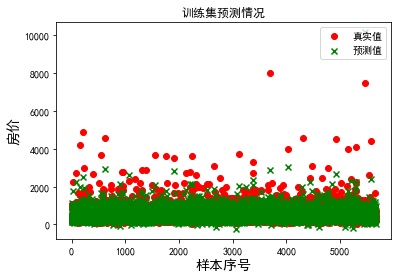

In [431]:
fig = plt.figure()
# fig.set_figheight(10)
# fig.set_figwidth(30)
plt.ioff()
plt.title('训练集预测情况')
plt.xlabel('样本序号', fontsize=14)
plt.ylabel('房价', fontsize=14)
plt.scatter(x=range(0,len(y_train)),y = y_train,color='r',marker='o',label='真实值')
plt.scatter(x=range(0,len(y_train)),y = y_pre,color='g',marker='x',label='预测值')
plt.legend(loc='upper right') #这个必须有
plt.show()

In [432]:
print("测试集MSE:",abs(model.score(x_test,y_test)))   #打印预测的MSE该值越接近于0越好 
y_test_pre = model.predict(x_test)

测试集MSE: -51829.39537051526


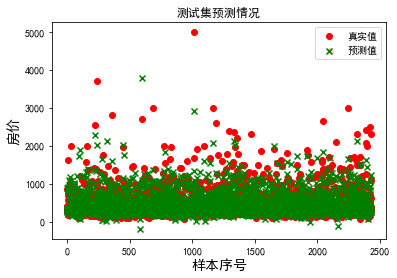

In [433]:
fig = plt.figure()
plt.ioff()
plt.title('测试集预测情况')
plt.xlabel('样本序号', fontsize=14)
plt.ylabel('房价', fontsize=14)
plt.scatter(x=range(0,len(y_test)),y = y_test,color='r',marker='o',label='真实值')
plt.scatter(x=range(0,len(y_test_pre)),y = y_test_pre,color='g',marker='x',label='预测值')
plt.legend(loc='upper right') #这个必须有
plt.show()